In [1]:
# import dependencies

import numpy as np
import pandas as pd
import plotly
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression
from matplotlib.dates import DateFormatter
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [14]:
# import data

sheet_id = '1bngHbR0YPS7XH1oSA1VxoL4R34z60SJcR3NxguZM9GI'
sheet_original = 'Original'
sheet_total = 'Totals'
url_original = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_original}'
url_total = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_total}'
df = pd.read_csv(url_original)
df_total = pd.read_csv(url_total)

print(df.head())

         Date  Russia_Total  Change  Ukraine_Total  Change.1  Ratio RU/UA  \
0  2022-02-24             0     NaN              0       NaN         0.00   
1  2022-02-25            52    52.0             59      59.0         0.88   
2  2022-02-26           107    55.0             88      29.0         1.22   
3  2022-02-27           161    54.0             96       8.0         1.68   
4  2022-02-28           321   160.0            147      51.0         2.18   

   Russia_Destroyed  Ukraine_Destroyed  Unnamed: 8  Russia_Damaged  ...  \
0                 0                  0         NaN               0  ...   
1                25                 27         NaN               5  ...   
2                42                 36         NaN               6  ...   
3                71                 38         NaN               6  ...   
4               139                 53         NaN               7  ...   

   Unnamed: 57  Russia_Antiair  Ukraine_Antiair  Unnamed: 60  \
0          NaN        

In [34]:
# Clean and Setup Data
df['Date'] = pd.to_datetime(df['Date'])
df_total['Date'] = pd.to_datetime(df_total['Date'])
total_russia_df = df[['Date','Russia_Total']]
total_ukraine_df = df[['Date','Ukraine_Total']]
tanks_russia_df = df[['Date','Russia_Tanks']]
tanks_ukraine_df = df[['Date','Ukraine_Tanks']]
ifv_russia_df = df[['Date','Russia_IFV']]
ifv_ukraine_df = df[['Date','Ukraine_IFV']]
apc_russia_df = df[['Date','Russia_APC']]
apc_ukraine_df = df[['Date','Ukraine_APC']]
imv_russia_df = df[['Date','Russia_IMV']]
imv_ukraine_df = df[['Date','Ukraine_IMV']]
eng_russia_df = df[['Date','Russia_Engineering']]
eng_ukraine_df = df[['Date','Ukraine_Engineering']]
art_russia_df = df[['Date','Russia_Artillery']]
art_ukraine_df = df[['Date','Ukraine_Artillery']]
aa_russia_df = df[['Date','Russia_Antiair']]
aa_ukraine_df = df[['Date','Ukraine_Antiair']]
aircraft_russia_df = df_total[['Date','Russia_Aircraft']]
aircraft_ukraine_df = df_total[['Date','Ukraine_Aircraft']]
ratio_df = df[['Date','Ratio RU/UA']]
russia_change_df = df[['Date','Change']]
russia_change_df['Change'] = russia_change_df['Change'].fillna(0)
ukraine_change_df = df[['Date','Change.1']]
ukraine_change_df['Change.1'] = ukraine_change_df['Change.1'].fillna(0)
Date = df[['Date']]

# Totals
Russia_Total = total_russia_df[['Russia_Total']]
Ukraine_Total = total_ukraine_df[['Ukraine_Total']]
Ratio = ratio_df[['Ratio RU/UA']]

Russia_Tank = tanks_russia_df[['Russia_Tanks']]
Ukraine_Tank = tanks_ukraine_df[['Ukraine_Tanks']]
Russia_IFV = ifv_russia_df[['Russia_IFV']]
Ukraine_IFV = ifv_ukraine_df[['Ukraine_IFV']]
Russia_Aircraft = aircraft_russia_df[['Russia_Aircraft']]
Ukraine_Aircraft = aircraft_ukraine_df[['Ukraine_Aircraft']]
Russia_APC = apc_russia_df[['Russia_APC']]
Ukraine_APC = apc_ukraine_df[['Ukraine_APC']]
Russia_IMV = imv_russia_df[['Russia_IMV']]
Ukraine_IMV = imv_ukraine_df[['Ukraine_IMV']]
Russia_ENG = eng_russia_df[['Russia_Engineering']]
Ukraine_ENG = eng_ukraine_df[['Ukraine_Engineering']]
Russia_Art = art_russia_df[['Russia_Artillery']]
Ukraine_Art = art_ukraine_df[['Ukraine_Artillery']]
Russia_AA = aa_russia_df[['Russia_Antiair']]
Ukraine_AA = aa_ukraine_df[['Ukraine_Antiair']]

# Daily Changes
RU_Change = russia_change_df.drop('Date', axis = 1)
UA_Change = ukraine_change_df.drop('Date', axis = 1)

Russia_Change = russia_change_df
Days = list(range(0,len(Russia_Change)))
Russia_Change['Days'] = Days
Russia_Change['Country'] = 'RU'

Ukraine_Change = ukraine_change_df.rename(columns = {'Change.1':'Change'})
Days = list(range(0,len(Ukraine_Change)))
Ukraine_Change['Days'] = Days
Ukraine_Change['Country'] = 'UA'

Daily_Change = pd.concat([Ukraine_Change, Russia_Change])

print(Daily_Change)

          Date  Change  Days Country
0   2022-02-24     0.0     0      UA
1   2022-02-25    59.0     1      UA
2   2022-02-26    29.0     2      UA
3   2022-02-27     8.0     3      UA
4   2022-02-28    51.0     4      UA
..         ...     ...   ...     ...
415 2023-04-15     0.0   415      RU
416 2023-04-16    21.0   416      RU
417 2023-04-17    20.0   417      RU
418 2023-04-18     9.0   418      RU
419 2023-04-19     0.0   419      RU

[840 rows x 4 columns]


C:\Users\Sam\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Sam\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Sam\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [69]:
# Model Forecasting and Prediction
from sklearn.model_selection import train_test_split

y1 = Russia_Total
y2 = Ukraine_Total
X = Date

X_train, X_test, y1_train, y1_test = train_test_split(X,
    y1, random_state=42, stratify=y)

# Regression
day_array = np.array(Days)

ru_poly = PolynomialFeatures(degree=5, include_bias=False)
ru_poly_features = ru_poly.fit_transform(day_array.reshape(-1, 1))
ru_poly_reg_model = LinearRegression()
ru_poly_reg_model.fit(ru_poly_features, Russia_Total)
ru_predicted = ru_poly_reg_model.predict(ru_poly_features)

ua_poly = PolynomialFeatures(degree=5, include_bias=False)
ua_poly_features = ua_poly.fit_transform(day_array.reshape(-1, 1))
ua_poly_reg_model = LinearRegression()
ua_poly_reg_model.fit(ua_poly_features, Ukraine_Total)
ua_predicted = ua_poly_reg_model.predict(ua_poly_features)

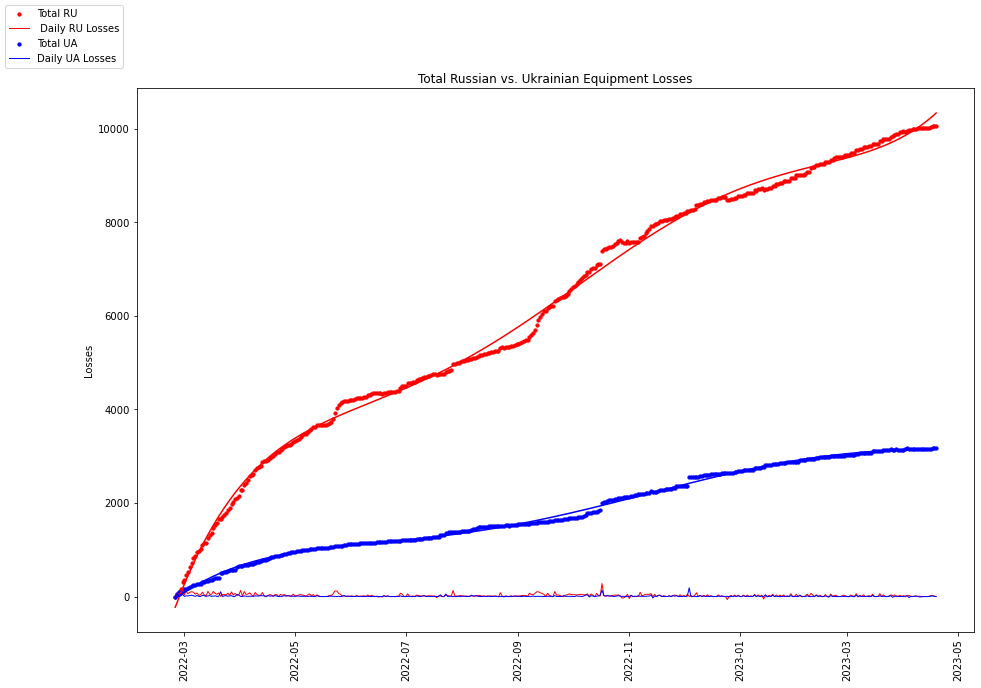

In [70]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_ylabel("Losses")
ax.scatter(Date, Russia_Total, s = 10.5, color = "red")
ax.plot(Date, RU_Change, linewidth = 1.0, color = "red")
ax.scatter(Date, Ukraine_Total, s = 10.5, color = "blue")
ax.plot(Date, UA_Change, linewidth = 1.0, color = "blue")
ax.plot(Date, ru_predicted, color = "red")
ax.plot(Date, ua_predicted, color = "blue")
ax.set_title('Total Russian vs. Ukrainian Equipment Losses')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.xticks(rotation = 90)
fig.legend(["Total RU"," Daily RU Losses", "Total UA", "Daily UA Losses"], loc = 'upper left')
#from matplotlib import style
#style.use('fivethirtyeight')
plt.show()

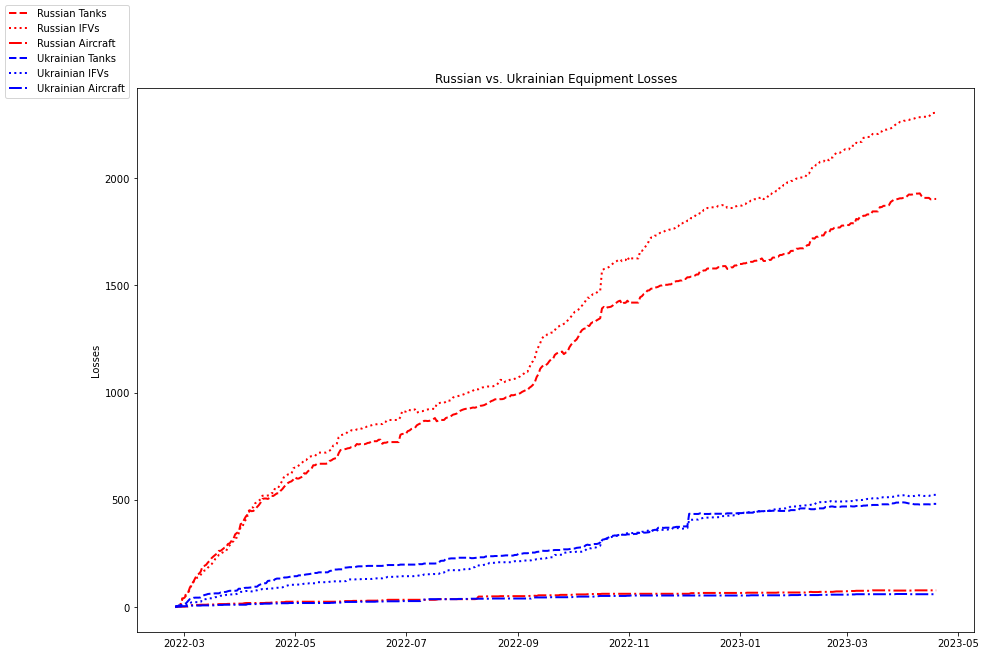

In [71]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(Date, Russia_Tank, linestyle='dashed', linewidth = 2, color = 'red')
ax.plot(Date, Russia_IFV, linestyle='dotted', linewidth = 2, color = 'red')
ax.plot(Date, Russia_Aircraft, linestyle='dashdot', linewidth = 2, color = 'red')
ax.plot(Date, Ukraine_Tank, linestyle='dashed', linewidth = 2, color = 'blue')
ax.plot(Date, Ukraine_IFV, linestyle='dotted', linewidth = 2, color = 'blue')
ax.plot(Date, Ukraine_Aircraft, linestyle='dashdot', linewidth = 2, color = 'blue')
ax.set_title('Russian vs. Ukrainian Equipment Losses')
ax.set_ylabel("Losses")
fig.legend(["Russian Tanks", "Russian IFVs", "Russian Aircraft", "Ukrainian Tanks", "Ukrainian IFVs", "Ukrainian Aircraft"], loc='upper left')
ax.set_title('Russian vs. Ukrainian Equipment Losses')
plt.show()

Text(0, 0.5, 'RU/UA')

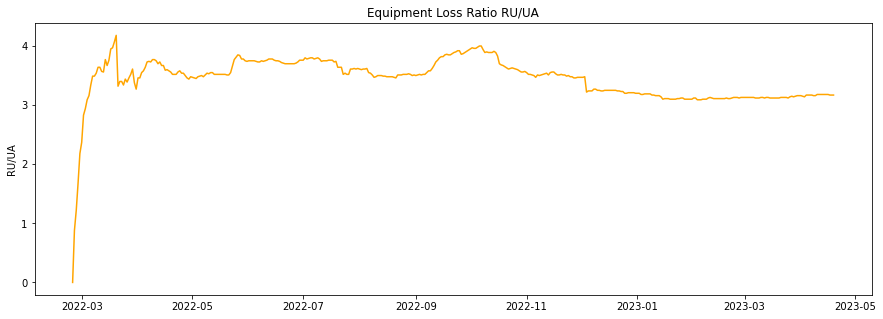

In [36]:
# Loss Raio Plot

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(Date, Ratio, color = 'orange')
ax.set_title('Equipment Loss Ratio RU/UA')
ax.set_ylabel("RU/UA")

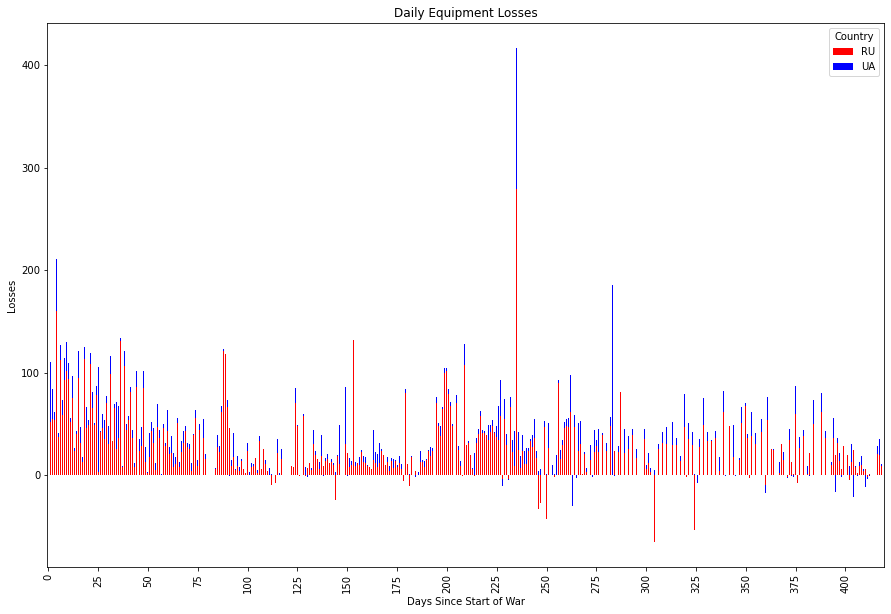

In [48]:
# Daily Losses Bar Plot

pivot = pd.pivot_table(data=Daily_Change, index=['Days'], columns=['Country'], values='Change')
ax = pivot.plot.bar(stacked=True, color =['red', 'blue'], figsize=(15,10))
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
ax.set_ylabel("Losses")
ax.set_xlabel("Days Since Start of War")
ax.set_title('Daily Equipment Losses')

plt.show()

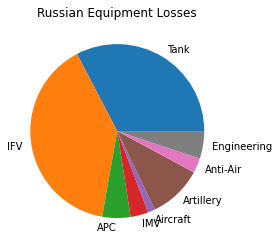

In [38]:
# Russia Pie Chart

RT = Russia_Tank['Russia_Tanks'].to_list()[-1]
RIFV = Russia_IFV['Russia_IFV'].to_list()[-1]
RAPC = Russia_APC['Russia_APC'].to_list()[-1]
RIMV = Russia_IMV['Russia_IMV'].to_list()[-1]
RA = Russia_Aircraft['Russia_Aircraft'].to_list()[-1]
RArt = Russia_Art['Russia_Artillery'].to_list()[-1]
RAA = Russia_AA['Russia_Antiair'].to_list()[-1]
RE = Russia_ENG['Russia_Engineering'].to_list()[-1]

l = ["Tank","IFV","APC","IMV","Aircraft","Artillery","Anti-Air","Engineering"]
slices = [RT, RIFV, RAPC, RIMV, RA, RArt, RAA, RE]
plt.pie(slices, labels = l)
plt.title('Russian Equipment Losses')
plt.show()

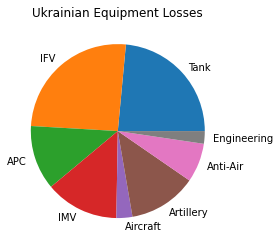

In [39]:
# Ukraine Pie Chart

UT = Ukraine_Tank['Ukraine_Tanks'].to_list()[-1]
UIFV = Ukraine_IFV['Ukraine_IFV'].to_list()[-1]
UAPC = Ukraine_APC['Ukraine_APC'].to_list()[-1]
UIMV = Ukraine_IMV['Ukraine_IMV'].to_list()[-1]
UA = Ukraine_Aircraft['Ukraine_Aircraft'].to_list()[-1]
UArt = Ukraine_Art['Ukraine_Artillery'].to_list()[-1]
UAA = Ukraine_AA['Ukraine_Antiair'].to_list()[-1]
UE = Ukraine_ENG['Ukraine_Engineering'].to_list()[-1]

l = ["Tank","IFV","APC","IMV","Aircraft","Artillery","Anti-Air","Engineering"]
slices = [UT, UIFV, UAPC, UIMV, UA, UArt, UAA, UE]
plt.pie(slices, labels = l)
plt.title('Ukrainian Equipment Losses')
plt.show()

In [ ]:
# Assemble Dashboard Elements

